Homework_4

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

C:\Users\sheba\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Step 1 Data Acquisition and Visualization (10 pts): In this step, you need to:
(a) Download the “MNIST” dataset and extract the files. You will get four files with
extension .gz (e.g., train-images-idx3-ubyte.gz). You can use the provided function read_idx
below to read in the dataset. As its official description, the dataset is split into 60000 training
images and 10000 images. 

The four file corresponds to the training images, training labels, testing images and testing labels. You need to print out their shape to finish this step. (5 pts)
(b) To further understand what the dataset is, you need to use the ‘matplotlib’ library to
print out a random data with code plt.imshow together with its label.(5 pts) You will
see something like this:


In [71]:
data = tf.keras.datasets.mnist #Loading the data
(x_train, y_train), (x_test, y_test) = data.load_data() #training and testing set
print("Training data dimensions: {}".format(x_train.shape))
print("Test data dimensions: {}".format(x_test.shape))

Training data dimensions: (60000, 28, 28)
Test data dimensions: (10000, 28, 28)


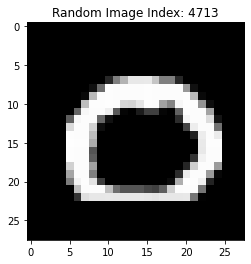

In [72]:
random_index = np.random.randint(0, len(x_train)) 

# Selecting the random image from x_train
random_image = x_train[random_index]

# Plotting the image
plt.imshow(random_image, cmap='gray') #showing random image with label
plt.title(f"Random Image Index: {random_index}")
plt.show()

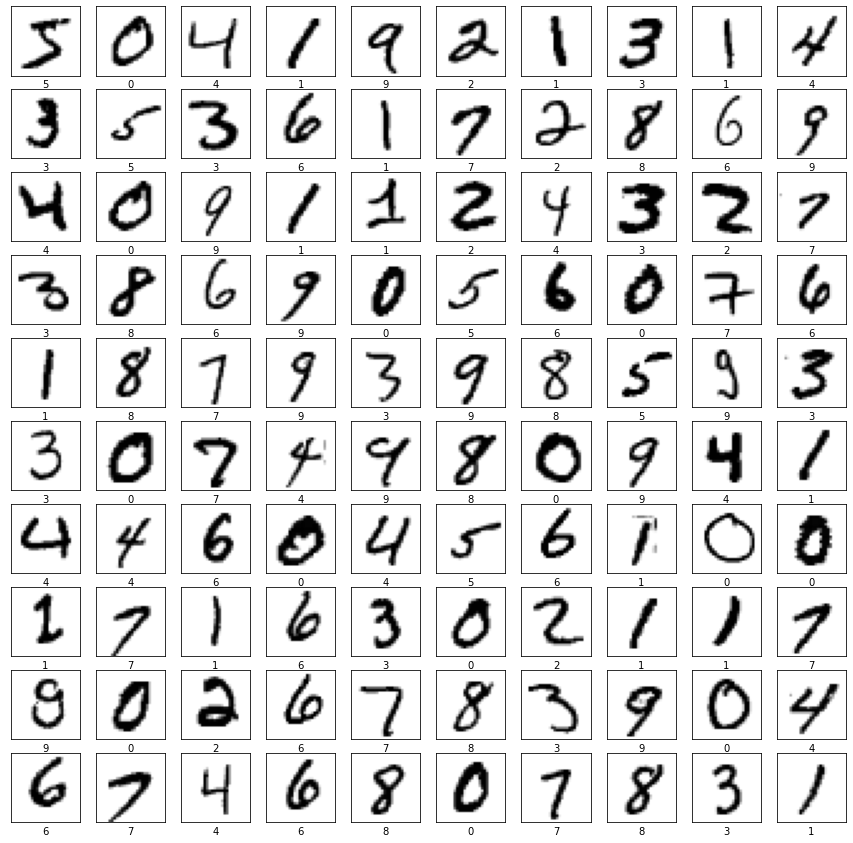

In [4]:
plt.figure(figsize = (15, 15))
for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Step 2 Data Preprocessing (10 pts): In this step, you need to:
(a) Normalize the pixel values of images to be between 0 and 1. (5 pts)
(b) Convert the labels from categorical data into numerical values using one-hot encoding.
(5 pts) hint: you can explore the eye function in Numpy

In [73]:
x_train = x_train.reshape(-1, 784) / 255.0 # Normalizing the data and reshaping it for the training part
x_test = x_test.reshape(-1, 784) / 255.0

num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train] #coverting the categorical data to the numerical values for the training process
y_test_one_hot = np.eye(num_classes)[y_test]


Step 3 Network Initialization (10 pts): We will work with a neuron network with
two hidden layers, using Sigmoid function as the activation functions for hidden
layers and softmax activation function for the output layer. To finish this, you
need to:
(a) Identify the auxiliary input including the Sigmoid function and its derivative and
Softmax function (5 pts)

(b) Initialize all the parameters in neural network uniformly. In this network, the input size
is 784 dimensions (each input is a 28x28 image, so you have to flatten the data from 2D
to 1D). For the two linear hidden layers, we have 128 and 64 neurons respectively. For
the output layer, its size will be 10 since there are 10 classes (0-9) in MNIST. To finish
this step, you need to initialize the weights and bias in random with a pre-set random
seed using Numpy. Please set the seed value = 695. (5 pts)

In [74]:
# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)



In [75]:
# Initializing Parameters
import numpy as np

# Setting the random seed 
np.random.seed(695)

# Input size (flattened 28x28 image)
input_size = 784

# Hidden layer sizes
hidden_layer1_size = 128
hidden_layer2_size = 64

# Output layer size (10 classes for MNIST)
output_size = 10



# Initializing weights (W) and biases (b) with uniform random values
# First hidden layer weights and biases
W1 = np.random.uniform(-1, 1, (input_size, hidden_layer1_size))
b1 = np.random.uniform(-1, 1, (hidden_layer1_size,))

# Second hidden layer weights and biases
W2 = np.random.uniform(-1, 1, (hidden_layer1_size, hidden_layer2_size))
b2 = np.random.uniform(-1, 1, (hidden_layer2_size,))

# Output layer weights and biases
W3 = np.random.uniform(-1, 1, (hidden_layer2_size, output_size))
b3 = np.random.uniform(-1, 1, (output_size,))


Step 4 Feed Forward (10 pts): In this step, you need to:
(a) define a function named feed_forward. Given an input x, it should output the sigmoid of
wx+b where w and b indicates the weights and bias defined in step 2. (5 pts)


In [76]:
# Feed-Forward Function
def feed_forward(W1, b1, W2, b2, W3, b3, x):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    output = softmax(z3)
    return z1, a1, z2, a2, z3, output

Step 5 Back Propagation (15 pts): In this step, you need to implement the back
propagation:
(a) You need to compute the loss for the output layer first. Here, we use categorical cross
entropy loss function given below for multi-class classification problem. (5 pts) Note, to
achieve this, you need to first encode the categorical labels as numerical values using
one-hot encoding finished in step 2. (5 pts)
(b) Calculate the gradients for the weights and bias for each layer. Use the chain rule to
compute gradients for previous layers. (10 pts)


In [77]:
def categorical_crossentropy(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
    return -np.sum(y_true * np.log(y_pred_clipped)) / n_samples


In [78]:

# Backpropagation
def back_propagation(x, y, a1, a2, z2, z3, W2, W3):
    delta3 = z3 - y
    dW3 = np.dot(a2.T, delta3) / x.shape[0]
    db3 = np.sum(delta3, axis=0) / x.shape[0]
    
    delta2 = np.dot(delta3, W3.T) * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, delta2) / x.shape[0]
    db2 = np.sum(delta2, axis=0) / x.shape[0]

    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(x.T, delta1) / x.shape[0]
    db1 = np.sum(delta1, axis=0) / x.shape[0]

    return dW1, dW2, dW3, db1, db2, db3

Step 6 Model Training (15 pts): In this step, you need to:
(a) Use mini-batch gradient descent to update the parameters including weights and bias.
Notice that a complete training round consists of a feed forward process, back
propagation and parameter update. Define the batch size = 128 and epoch = 100.

In [79]:
learning_rate = 0.01
epochs = 100
batch_size = 128

In [80]:
# Training Loop
loss_history = []
loss_history_test = []
n_batches = x_train.shape[0] // batch_size  #mini batching

for epoch in range(epochs):
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices) #Shuffleing the indices of the training image
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train_one_hot[indices]
    
    for _ in range(n_batches):
        batch_indices = np.random.choice(x_train.shape[0], batch_size, replace=False)
        x_batch = x_train_shuffled[batch_indices]
        y_batch = y_train_shuffled[batch_indices]
        
        # Forward Pass
        z1, a1, z2, a2, z3, output = feed_forward(W1, b1, W2, b2, W3, b3, x_batch)
        
        # Backpropagation
        dW1, dW2, dW3, db1, db2, db3 = back_propagation(x_batch, y_batch, a1, a2, z2, z3, W2, W3)
        
        # Updating Weights and Biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

    # Calculateing Loss
     # Calculate loss for the epoch
    _, _, _, _, _, train_output = feed_forward(W1, b1, W2, b2, W3, b3, x_train)
    epoch_loss = categorical_crossentropy(y_train_one_hot, train_output)
    loss_history.append(epoch_loss)

    _, _, _, _, _, test_output = feed_forward(W1, b1, W2, b2, W3, b3, x_test)
    epoch_loss_test = categorical_crossentropy(y_test_one_hot, test_output)
    loss_history_test.append(epoch_loss_test)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_loss:.4f}, Test Loss: {epoch_loss_test:.4f}")





Epoch 1/100, Train Loss: 2.2373, Test Loss: 2.2381
Epoch 2/100, Train Loss: 2.2429, Test Loss: 2.2435
Epoch 3/100, Train Loss: 2.2470, Test Loss: 2.2478
Epoch 4/100, Train Loss: 2.2482, Test Loss: 2.2491
Epoch 5/100, Train Loss: 2.2471, Test Loss: 2.2479
Epoch 6/100, Train Loss: 2.2455, Test Loss: 2.2464
Epoch 7/100, Train Loss: 2.2421, Test Loss: 2.2431
Epoch 8/100, Train Loss: 2.2387, Test Loss: 2.2396
Epoch 9/100, Train Loss: 2.2355, Test Loss: 2.2364
Epoch 10/100, Train Loss: 2.2315, Test Loss: 2.2326
Epoch 11/100, Train Loss: 2.2272, Test Loss: 2.2283
Epoch 12/100, Train Loss: 2.2226, Test Loss: 2.2238
Epoch 13/100, Train Loss: 2.2178, Test Loss: 2.2191
Epoch 14/100, Train Loss: 2.2130, Test Loss: 2.2145
Epoch 15/100, Train Loss: 2.2083, Test Loss: 2.2098
Epoch 16/100, Train Loss: 2.2025, Test Loss: 2.2041
Epoch 17/100, Train Loss: 2.1972, Test Loss: 2.1990
Epoch 18/100, Train Loss: 2.1907, Test Loss: 2.1925
Epoch 19/100, Train Loss: 2.1837, Test Loss: 2.1857
Epoch 20/100, Train L

Step 7 Model Evaluation (10 pts): In this step, you need to:
(a) Use your trained neural network to predict the labels of the test dataset and compute
the accuracy on the test dataset. (5 pts)
(b) Plot some of the misclassified images with their predicted and true labels. (5 pts) This
probably can give you some insights into why these images are misclassified.

Final Train Accuracy: 70.33%
Final Test Accuracy: 70.77%


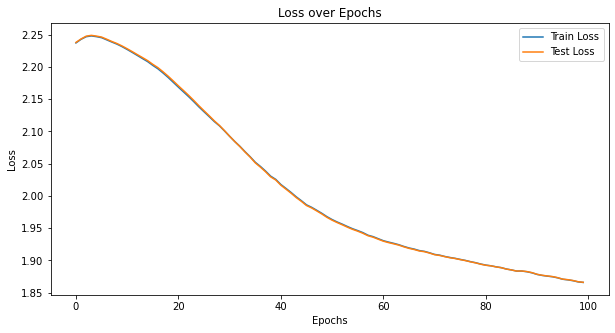

In [81]:
# Calculating Accuracy
def calculate_accuracy(y_true, y_pred): #accuracy
    predicted_classes = np.argmax(y_pred, axis=1) #since in the training, the output was probablity based on the softmax, for finding accuracy, 
    #it need to be in label format
    
    true_classes = np.argmax(y_true, axis=1)
    return np.mean(predicted_classes == true_classes)

train_accuracy = calculate_accuracy(y_train_one_hot, train_output)
test_accuracy = calculate_accuracy(y_test_one_hot, test_output)

print(f"Final Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

# Plotting Loss History
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label="Train Loss")
plt.plot(loss_history_test, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()


In [82]:
predicted_classes = np.argmax(test_output, axis=1)


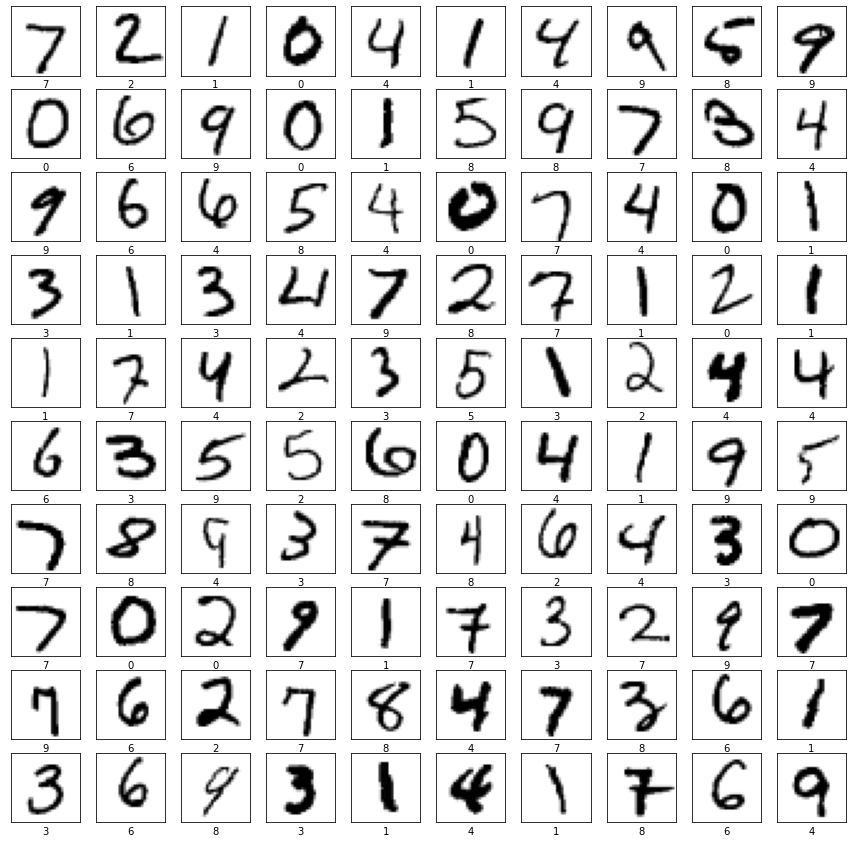

In [83]:
plt.figure(figsize = (15, 15)) #showing the images of the output with their labels.
for i in range(10*10):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.xlabel(predicted_classes[i])
plt.show()